In [1]:
import torch
import torchvision.datasets
import torchvision.models
from torch.utils.data import DataLoader, Dataset, SubsetRandomSampler
from torchvision import transforms
import torch.nn as nn
from tqdm import tqdm
from train_utils import train, test
from PIL import Image
import pandas as pd
import numpy as np
from convnet import ConvNet

In [2]:
cifar100_root = '../cifar100'
ipc1 = np.loadtxt('./random_ipc_index/cifar100/ipc_1.txt', dtype=int)
ipc1

array([14834,  4865, 16490, 30919, 12222, 38986, 41862, 19745, 26468,
       40694])

In [3]:
cifar100_train = torchvision.datasets.CIFAR100(cifar100_root,
                                            train=True,
                                            transform=transforms.Compose([
                                                                          # transforms.Resize(128),
                                                                          transforms.RandomHorizontalFlip(),
                                                                          transforms.ToTensor(),
                                                                          transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
                                                                        ]))


cifar100_test = torchvision.datasets.CIFAR100(cifar100_root,
                                            train=False,
                                            transform=transforms.Compose([
                                                # transforms.Resize(128),
                                                transforms.ToTensor(),
                                                transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
                                              ]))
                                              

In [4]:
batch_size = 1 
train_data_loader = DataLoader(cifar100_train, batch_size=batch_size, sampler=SubsetRandomSampler(ipc1))
test_data_loader = DataLoader(cifar100_test, batch_size=batch_size, shuffle=False)

In [5]:
len(train_data_loader)

10

In [6]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"[INFO]: Computation device: {device}")

[INFO]: Computation device: cuda


In [7]:
import os

model_name = 'ConvNetD3'
dataset = 'cifar100_ipc1'
model_path = f'./model_weight/{dataset}/{model_name}/'
if not os.path.exists(model_path):
    os.makedirs(model_path)
# Following ConvNetD3's definition from the DATM paper, but first one changed to 32 from 128
net_width, net_depth, net_act, net_norm, net_pooling = 32, 3, 'relu', 'instancenorm', 'avgpooling'
model = ConvNet(channel=3, num_classes=100, net_width=net_width, net_depth=3, net_act=net_act, net_norm=net_norm, net_pooling=net_pooling)

In [8]:
train_record, test_record  = train(model, model_path, train_data_loader, test_data_loader, num_epochs=100, optimizer='sgd', lr=1e-2)

Epoch 1: 100%|██████████| 10/10 [00:00<00:00, 45.48it/s, loss=5.98]


epoch: 1 done, loss: 0.0010399194434285164
Acc: 0.0123
[0.01]


Epoch 2: 100%|██████████| 10/10 [00:00<00:00, 249.54it/s, loss=1.55]

epoch: 2 done, loss: 0.00039494707016274333


Acc: 0.0193
[0.01]


Epoch 3: 100%|██████████| 10/10 [00:00<00:00, 197.33it/s, loss=0.00113]

epoch: 3 done, loss: 0.0002411074237897992


Acc: 0.0177
[0.01]


Epoch 4: 100%|██████████| 10/10 [00:00<00:00, 218.45it/s, loss=0.0188]

epoch: 4 done, loss: 4.9709142331266776e-05


Acc: 0.0146
[0.01]


Epoch 5: 100%|██████████| 10/10 [00:00<00:00, 253.92it/s, loss=0.0155]

epoch: 5 done, loss: 0.00045415773638524115


Acc: 0.015
[0.001]


Epoch 6: 100%|██████████| 10/10 [00:00<00:00, 231.34it/s, loss=0.00141]


epoch: 6 done, loss: 3.468978684395552e-05
Acc: 0.0152
[0.001]


Epoch 7: 100%|██████████| 10/10 [00:00<00:00, 195.79it/s, loss=0.0927]

epoch: 7 done, loss: 6.8628787630586885e-06


Acc: 0.0149
[0.001]


Epoch 8: 100%|██████████| 10/10 [00:00<00:00, 243.52it/s, loss=0.000234]

epoch: 8 done, loss: 5.835971478518331e-06


Acc: 0.0151
[0.001]


Epoch 9: 100%|██████████| 10/10 [00:00<00:00, 212.50it/s, loss=0.0438]

epoch: 9 done, loss: 9.357943054055795e-05


Acc: 0.0154
[0.0001]


Epoch 10: 100%|██████████| 10/10 [00:00<00:00, 232.22it/s, loss=0.0187]

epoch: 10 done, loss: 2.9927527975814883e-06


Acc: 0.0154
[0.0001]


Epoch 11: 100%|██████████| 10/10 [00:00<00:00, 194.19it/s, loss=0.000179]

epoch: 11 done, loss: 5.17722992299241e-06


Acc: 0.0154
[0.0001]


Epoch 12: 100%|██████████| 10/10 [00:00<00:00, 216.44it/s, loss=0.0369]

epoch: 12 done, loss: 6.464292528107762e-05


Acc: 0.0154
[0.0001]


Epoch 13: 100%|██████████| 10/10 [00:00<00:00, 212.45it/s, loss=0.042]

epoch: 13 done, loss: 3.89468777939328e-06


Acc: 0.0154
[1e-05]


Epoch 14: 100%|██████████| 10/10 [00:00<00:00, 178.02it/s, loss=0.00457]

epoch: 14 done, loss: 4.489108960115118e-06


Acc: 0.0154
[1e-05]


Epoch 15: 100%|██████████| 10/10 [00:00<00:00, 212.09it/s, loss=0.0382]

epoch: 15 done, loss: 4.607302344084019e-06


Acc: 0.0154
[1e-05]


Epoch 16: 100%|██████████| 10/10 [00:00<00:00, 224.80it/s, loss=0.0727]

epoch: 16 done, loss: 4.421555331646232e-06


Acc: 0.0154
[1e-05]


Epoch 17: 100%|██████████| 10/10 [00:00<00:00, 174.74it/s, loss=0.0376]

epoch: 17 done, loss: 5.954714288236573e-05


Acc: 0.0154
[1.0000000000000002e-06]


Epoch 18: 100%|██████████| 10/10 [00:00<00:00, 211.93it/s, loss=2.83]

epoch: 18 done, loss: 6.059293446014635e-05


Acc: 0.0154
[1.0000000000000002e-06]


Epoch 19: 100%|██████████| 10/10 [00:00<00:00, 204.70it/s, loss=0.0367]

epoch: 19 done, loss: 4.7003391046018805e-06


Acc: 0.0154
[1.0000000000000002e-06]


Epoch 20: 100%|██████████| 10/10 [00:00<00:00, 139.22it/s, loss=0.00109]

epoch: 20 done, loss: 4.566023108054651e-06


Acc: 0.0154
[1.0000000000000002e-06]


Epoch 21: 100%|██████████| 10/10 [00:00<00:00, 187.82it/s, loss=0.000177]

epoch: 21 done, loss: 6.0784783272538334e-05


Acc: 0.0154
[1.0000000000000002e-06]


Epoch 22: 100%|██████████| 10/10 [00:00<00:00, 198.66it/s, loss=0.0471]

epoch: 22 done, loss: 5.9970781876472756e-05


Acc: 0.0154
[1.0000000000000002e-06]


Epoch 23: 100%|██████████| 10/10 [00:00<00:00, 190.30it/s, loss=0.00334]

epoch: 23 done, loss: 6.068396760383621e-05


Acc: 0.0154
[1.0000000000000002e-06]


Epoch 24: 100%|██████████| 10/10 [00:00<00:00, 170.79it/s, loss=0.0185]

epoch: 24 done, loss: 5.9790716477436945e-05


Acc: 0.0154
[1.0000000000000002e-06]


Epoch 25: 100%|██████████| 10/10 [00:00<00:00, 151.94it/s, loss=0.000177]

epoch: 25 done, loss: 5.732742465625051e-06


Acc: 0.0154
[1.0000000000000002e-06]


Epoch 26: 100%|██████████| 10/10 [00:00<00:00, 182.23it/s, loss=0.047]

epoch: 26 done, loss: 6.173919973662123e-05


Acc: 0.0154
[1.0000000000000002e-06]


Epoch 27: 100%|██████████| 10/10 [00:00<00:00, 177.77it/s, loss=0.021]

epoch: 27 done, loss: 6.040829612175003e-05


Acc: 0.0154
[1.0000000000000002e-06]


Epoch 28: 100%|██████████| 10/10 [00:00<00:00, 174.17it/s, loss=0.00136]

epoch: 28 done, loss: 3.1031900107336696e-06


Acc: 0.0154
[1.0000000000000002e-06]


Epoch 29: 100%|██████████| 10/10 [00:00<00:00, 180.58it/s, loss=0.00464]

epoch: 29 done, loss: 3.7803338273079135e-06


Acc: 0.0154
[1.0000000000000002e-06]


Epoch 30: 100%|██████████| 10/10 [00:00<00:00, 210.53it/s, loss=0.0403]

epoch: 30 done, loss: 3.226795797672821e-06


Acc: 0.0154
[1.0000000000000002e-06]


Epoch 31: 100%|██████████| 10/10 [00:00<00:00, 203.67it/s, loss=0.0375]

epoch: 31 done, loss: 6.025908442097716e-05


Acc: 0.0154
[1.0000000000000002e-06]


Epoch 32: 100%|██████████| 10/10 [00:00<00:00, 237.47it/s, loss=0.042]

epoch: 32 done, loss: 5.577046067628544e-06


Acc: 0.0154
[1.0000000000000002e-06]


Epoch 33: 100%|██████████| 10/10 [00:00<00:00, 197.36it/s, loss=0.042]

epoch: 33 done, loss: 6.148178272269433e-06


Acc: 0.0154
[1.0000000000000002e-06]


Epoch 34: 100%|██████████| 10/10 [00:00<00:00, 246.28it/s, loss=0.0789]

epoch: 34 done, loss: 5.623037850455148e-06


Acc: 0.0154
[1.0000000000000002e-06]


Epoch 35: 100%|██████████| 10/10 [00:00<00:00, 230.80it/s, loss=0.00464]

epoch: 35 done, loss: 2.9359048312471714e-06


Acc: 0.0154
[1.0000000000000002e-06]


Epoch 36: 100%|██████████| 10/10 [00:00<00:00, 232.25it/s, loss=0.0419]

epoch: 36 done, loss: 6.10911229159683e-05


Acc: 0.0154
[1.0000000000000002e-06]


Epoch 37: 100%|██████████| 10/10 [00:00<00:00, 244.31it/s, loss=0.0374]

epoch: 37 done, loss: 6.034048419678584e-05


Acc: 0.0154
[1.0000000000000002e-06]


Epoch 38: 100%|██████████| 10/10 [00:00<00:00, 219.99it/s, loss=0.00108]

epoch: 38 done, loss: 5.0305734475841746e-06


Acc: 0.0154
[1.0000000000000002e-06]


Epoch 39: 100%|██████████| 10/10 [00:00<00:00, 231.15it/s, loss=0.00108]

epoch: 39 done, loss: 4.7653052206442226e-06


Acc: 0.0154
[1.0000000000000002e-06]


Epoch 40: 100%|██████████| 10/10 [00:00<00:00, 222.44it/s, loss=0.0419]

epoch: 40 done, loss: 6.0738486354239285e-05


Acc: 0.0154
[1.0000000000000002e-06]


Epoch 41: 100%|██████████| 10/10 [00:00<00:00, 241.85it/s, loss=2.68e-5]

epoch: 41 done, loss: 5.897529990761541e-05


Acc: 0.0155
[1.0000000000000002e-06]


Epoch 42: 100%|██████████| 10/10 [00:00<00:00, 245.85it/s, loss=2.68e-5]

epoch: 42 done, loss: 3.51281278199167e-06


Acc: 0.0155
[1.0000000000000002e-06]


Epoch 43: 100%|██████████| 10/10 [00:00<00:00, 238.19it/s, loss=0.00458]

epoch: 43 done, loss: 3.6373598959471565e-06


Acc: 0.0155
[1.0000000000000002e-06]


Epoch 44: 100%|██████████| 10/10 [00:00<00:00, 234.35it/s, loss=2.8]

epoch: 44 done, loss: 5.888491796213202e-05


Acc: 0.0155
[1.0000000000000002e-06]


Epoch 45: 100%|██████████| 10/10 [00:00<00:00, 211.97it/s, loss=0.079]

epoch: 45 done, loss: 4.23918118030997e-06


Acc: 0.0155
[1.0000000000000002e-06]


Epoch 46: 100%|██████████| 10/10 [00:00<00:00, 258.02it/s, loss=0.00136]

epoch: 46 done, loss: 5.6247827160404995e-06


Acc: 0.0155
[1.0000000000000002e-06]


Epoch 47: 100%|██████████| 10/10 [00:00<00:00, 239.16it/s, loss=0.00136]

epoch: 47 done, loss: 6.001327346893959e-05


Acc: 0.0155
[1.0000000000000002e-06]


Epoch 48: 100%|██████████| 10/10 [00:00<00:00, 215.38it/s, loss=0.0367]

epoch: 48 done, loss: 4.751896540255984e-06


Acc: 0.0155
[1.0000000000000002e-06]


Epoch 49: 100%|██████████| 10/10 [00:00<00:00, 249.67it/s, loss=0.000284]


epoch: 49 done, loss: 6.003924136166461e-05
Acc: 0.0155
[1.0000000000000002e-06]


Epoch 50: 100%|██████████| 10/10 [00:00<00:00, 210.27it/s, loss=0.00458]

epoch: 50 done, loss: 5.8989302488043904e-05


Acc: 0.0155
[1.0000000000000002e-06]


Epoch 51: 100%|██████████| 10/10 [00:00<00:00, 209.50it/s, loss=0.0402]

epoch: 51 done, loss: 6.090821261750534e-05


Acc: 0.0155
[1.0000000000000002e-06]


Epoch 52: 100%|██████████| 10/10 [00:00<00:00, 178.94it/s, loss=0.079]

epoch: 52 done, loss: 6.01205465500243e-05


Acc: 0.0155
[1.0000000000000002e-06]


Epoch 53: 100%|██████████| 10/10 [00:00<00:00, 219.60it/s, loss=0.00458]

epoch: 53 done, loss: 4.18659465140081e-06


Acc: 0.0155
[1.0000000000000002e-06]


Epoch 54: 100%|██████████| 10/10 [00:00<00:00, 201.83it/s, loss=0.042]

epoch: 54 done, loss: 6.020135697326623e-05


Acc: 0.0155
[1.0000000000000002e-06]


Epoch 55: 100%|██████████| 10/10 [00:00<00:00, 203.87it/s, loss=0.00334]

epoch: 55 done, loss: 4.4715557123709004e-06


Acc: 0.0155
[1.0000000000000002e-06]


Epoch 56: 100%|██████████| 10/10 [00:00<00:00, 226.72it/s, loss=0.0022]

epoch: 56 done, loss: 6.0832142480649054e-05


Acc: 0.0155
[1.0000000000000002e-06]


Epoch 57: 100%|██████████| 10/10 [00:00<00:00, 184.37it/s, loss=0.0469]

epoch: 57 done, loss: 6.121597834862769e-05


Acc: 0.0156
[1.0000000000000002e-06]


Epoch 58: 100%|██████████| 10/10 [00:00<00:00, 198.29it/s, loss=0.000284]

epoch: 58 done, loss: 6.112914707046002e-05


Acc: 0.0156
[1.0000000000000002e-06]


Epoch 59: 100%|██████████| 10/10 [00:00<00:00, 211.10it/s, loss=0.021]

epoch: 59 done, loss: 5.9943875385215506e-05


Acc: 0.0156
[1.0000000000000002e-06]


Epoch 60: 100%|██████████| 10/10 [00:00<00:00, 180.46it/s, loss=0.00458]

epoch: 60 done, loss: 6.029102951288223e-05


Acc: 0.0156
[1.0000000000000002e-06]


Epoch 61: 100%|██████████| 10/10 [00:00<00:00, 235.07it/s, loss=0.00108]

epoch: 61 done, loss: 3.2207940421358217e-06


Acc: 0.0156
[1.0000000000000002e-06]


Epoch 62: 100%|██████████| 10/10 [00:00<00:00, 234.36it/s, loss=0.021]

epoch: 62 done, loss: 5.964612682873849e-06


Acc: 0.0156
[1.0000000000000002e-06]


Epoch 63: 100%|██████████| 10/10 [00:00<00:00, 164.21it/s, loss=0.00108]

epoch: 63 done, loss: 4.775044999405509e-06


Acc: 0.0156
[1.0000000000000002e-06]


Epoch 64: 100%|██████████| 10/10 [00:00<00:00, 212.84it/s, loss=2.68e-5]

epoch: 64 done, loss: 5.8884805184789e-05


Acc: 0.0156
[1.0000000000000002e-06]


Epoch 65: 100%|██████████| 10/10 [00:00<00:00, 213.37it/s, loss=0.000284]

epoch: 65 done, loss: 4.7391026782861445e-06


Acc: 0.0156
[1.0000000000000002e-06]


Epoch 66: 100%|██████████| 10/10 [00:00<00:00, 191.22it/s, loss=0.00334]

epoch: 66 done, loss: 4.865114988206187e-06


Acc: 0.0156
[1.0000000000000002e-06]


Epoch 67: 100%|██████████| 10/10 [00:00<00:00, 227.80it/s, loss=0.0401]

epoch: 67 done, loss: 5.845064151799306e-05


Acc: 0.0156
[1.0000000000000002e-06]


Epoch 68: 100%|██████████| 10/10 [00:00<00:00, 220.12it/s, loss=0.00334]

epoch: 68 done, loss: 5.468419658427592e-06


Acc: 0.0156
[1.0000000000000002e-06]


Epoch 69: 100%|██████████| 10/10 [00:00<00:00, 220.52it/s, loss=0.00108]

epoch: 69 done, loss: 6.1816745073883794e-06


Acc: 0.0156
[1.0000000000000002e-06]


Epoch 70: 100%|██████████| 10/10 [00:00<00:00, 139.48it/s, loss=0.0368]

epoch: 70 done, loss: 6.16114484728314e-05


Acc: 0.0156
[1.0000000000000002e-06]


Epoch 71: 100%|██████████| 10/10 [00:00<00:00, 199.78it/s, loss=2.68e-5]

epoch: 71 done, loss: 6.10410570516251e-05


Acc: 0.0156
[1.0000000000000002e-06]


Epoch 72: 100%|██████████| 10/10 [00:00<00:00, 149.38it/s, loss=0.0469]

epoch: 72 done, loss: 6.016076076775789e-05


Acc: 0.0156
[1.0000000000000002e-06]


Epoch 73: 100%|██████████| 10/10 [00:00<00:00, 189.03it/s, loss=0.04]

epoch: 73 done, loss: 2.8846966415585484e-06


Acc: 0.0156
[1.0000000000000002e-06]


Epoch 74: 100%|██████████| 10/10 [00:00<00:00, 172.35it/s, loss=0.0381]

epoch: 74 done, loss: 6.167144601931795e-05


Acc: 0.0156
[1.0000000000000002e-06]


Epoch 75: 100%|██████████| 10/10 [00:00<00:00, 196.03it/s, loss=0.00334]

epoch: 75 done, loss: 4.185384568700101e-06


Acc: 0.0156
[1.0000000000000002e-06]


Epoch 76: 100%|██████████| 10/10 [00:00<00:00, 192.98it/s, loss=0.04]

epoch: 76 done, loss: 5.176098056836054e-06


Acc: 0.0156
[1.0000000000000002e-06]


Epoch 77: 100%|██████████| 10/10 [00:00<00:00, 176.73it/s, loss=0.0368]

epoch: 77 done, loss: 5.9608573792502284e-05


Acc: 0.0156
[1.0000000000000002e-06]


Epoch 78: 100%|██████████| 10/10 [00:00<00:00, 172.52it/s, loss=0.0368]

epoch: 78 done, loss: 6.0779402701882645e-05


Acc: 0.0156
[1.0000000000000002e-06]


Epoch 79: 100%|██████████| 10/10 [00:00<00:00, 178.52it/s, loss=0.0022]

epoch: 79 done, loss: 6.110760295996442e-05


Acc: 0.0156
[1.0000000000000002e-06]


Epoch 80: 100%|██████████| 10/10 [00:00<00:00, 201.19it/s, loss=0.00465]

epoch: 80 done, loss: 2.9707159683312057e-06


Acc: 0.0156
[1.0000000000000002e-06]


Epoch 81: 100%|██████████| 10/10 [00:00<00:00, 188.08it/s, loss=2.68e-5]

epoch: 81 done, loss: 6.081461833673529e-05


Acc: 0.0156
[1.0000000000000002e-06]


Epoch 82: 100%|██████████| 10/10 [00:00<00:00, 187.90it/s, loss=2.68e-5]

epoch: 82 done, loss: 6.0230195231270045e-05


Acc: 0.0156
[1.0000000000000002e-06]


Epoch 83: 100%|██████████| 10/10 [00:00<00:00, 223.44it/s, loss=0.00334]

epoch: 83 done, loss: 6.0721162299159914e-05


Acc: 0.0156
[1.0000000000000002e-06]


Epoch 84: 100%|██████████| 10/10 [00:00<00:00, 219.78it/s, loss=0.072]

epoch: 84 done, loss: 6.097467121435329e-05


Acc: 0.0156
[1.0000000000000002e-06]


Epoch 85: 100%|██████████| 10/10 [00:00<00:00, 239.96it/s, loss=0.000177]

epoch: 85 done, loss: 5.902642442379147e-05


Acc: 0.0156
[1.0000000000000002e-06]


Epoch 86: 100%|██████████| 10/10 [00:00<00:00, 206.79it/s, loss=0.000177]

epoch: 86 done, loss: 4.308672032493632e-06


Acc: 0.0156
[1.0000000000000002e-06]


Epoch 87: 100%|██████████| 10/10 [00:00<00:00, 205.94it/s, loss=0.0468]

epoch: 87 done, loss: 4.190284926153254e-06


Acc: 0.0156
[1.0000000000000002e-06]


Epoch 88: 100%|██████████| 10/10 [00:00<00:00, 168.15it/s, loss=2.68e-5]

epoch: 88 done, loss: 5.806408080388792e-05


Acc: 0.0156
[1.0000000000000002e-06]


Epoch 89: 100%|██████████| 10/10 [00:00<00:00, 187.67it/s, loss=0.0719]

epoch: 89 done, loss: 4.839568646275438e-06


Acc: 0.0156
[1.0000000000000002e-06]


Epoch 90: 100%|██████████| 10/10 [00:00<00:00, 236.65it/s, loss=2.76]

epoch: 90 done, loss: 5.959632835583761e-05


Acc: 0.0156
[1.0000000000000002e-06]


Epoch 91: 100%|██████████| 10/10 [00:00<00:00, 193.02it/s, loss=0.021]

epoch: 91 done, loss: 5.961071656201966e-05


Acc: 0.0156
[1.0000000000000002e-06]


Epoch 92: 100%|██████████| 10/10 [00:00<00:00, 206.05it/s, loss=0.042]

epoch: 92 done, loss: 5.979718116577715e-05


Acc: 0.0156
[1.0000000000000002e-06]


Epoch 93: 100%|██████████| 10/10 [00:00<00:00, 179.16it/s, loss=0.0368]

epoch: 93 done, loss: 5.8917124988511205e-05


Acc: 0.0156
[1.0000000000000002e-06]


Epoch 94: 100%|██████████| 10/10 [00:00<00:00, 202.07it/s, loss=0.0022]

epoch: 94 done, loss: 3.855594968626974e-06


Acc: 0.0156
[1.0000000000000002e-06]


Epoch 95: 100%|██████████| 10/10 [00:00<00:00, 234.87it/s, loss=0.0372]

epoch: 95 done, loss: 4.872073532169452e-06


Acc: 0.0156
[1.0000000000000002e-06]


Epoch 96: 100%|██████████| 10/10 [00:00<00:00, 218.69it/s, loss=0.000177]

epoch: 96 done, loss: 3.8389634937630035e-06


Acc: 0.0156
[1.0000000000000002e-06]


Epoch 97: 100%|██████████| 10/10 [00:00<00:00, 189.64it/s, loss=0.00108]

epoch: 97 done, loss: 4.20034803028102e-06


Acc: 0.0156
[1.0000000000000002e-06]


Epoch 98: 100%|██████████| 10/10 [00:00<00:00, 196.53it/s, loss=0.00334]

epoch: 98 done, loss: 6.014706377754919e-05


Acc: 0.0156
[1.0000000000000002e-06]


Epoch 99: 100%|██████████| 10/10 [00:00<00:00, 222.11it/s, loss=0.0793]

epoch: 99 done, loss: 4.082817213202361e-06


Acc: 0.0156
[1.0000000000000002e-06]


Epoch 100: 100%|██████████| 10/10 [00:00<00:00, 229.10it/s, loss=0.00465]

epoch: 100 done, loss: 4.142712441534968e-06


Acc: 0.0156
[1.0000000000000002e-06]
Time taken: 1340.471598 seconds


In [9]:
test(model, f'{model_path}/model.bin', test_data_loader, criterion=nn.CrossEntropyLoss()) #best_acc, test_loss

(0.0193, tensor(8.1917, device='cuda:0'))

<AxesSubplot: >

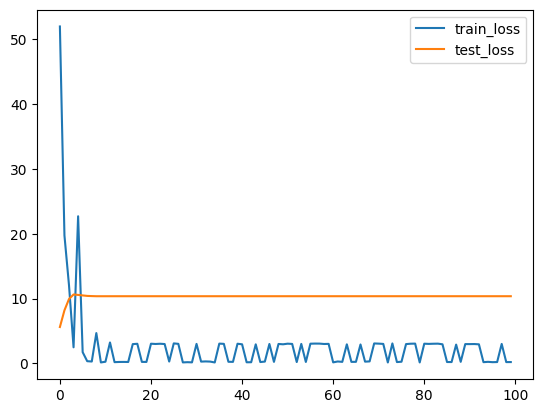

In [10]:
import pandas as pd
results = pd.DataFrame([])
results['train_loss']  = train_record
results['test_loss']  = test_record
results.plot.line(y=['train_loss', 'test_loss'])